In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,NaN,0.26,1.28,4.38,1.05,NaN,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,NaN,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,NaN,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	28
float64		column 3	29
float64		column 4	7
float64		column 5	14
float64		column 6	29
float64		column 7	22
float64		column 8	7
float64		column 9	7
float64		column 10	22
float64		column 11	8
float64		column 12	15
float64		column 13	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,164.000000,150.000000,149.000000,171.000000,164.000000,149.000000,156.000000,171.000000,171.000000,156.000000,170.000000,163.000000,164.000000
mean,12.991524,2.227400,2.375973,19.402339,99.981707,2.292483,1.981410,0.359064,1.595789,4.901731,0.957271,2.615460,738.335366
std,0.790872,0.998519,0.257425,3.351434,14.132360,0.606159,0.967836,0.121782,0.562753,2.163531,0.224862,0.681408,301.539247
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.367500,1.610000,2.250000,17.050000,88.000000,1.790000,1.175000,0.270000,1.250000,3.200000,0.790000,2.005000,507.500000
50%,13.050000,1.830000,2.370000,19.100000,98.000000,2.320000,2.065000,0.340000,1.560000,4.690000,0.960000,2.780000,673.500000
75%,13.622500,2.740000,2.540000,21.500000,107.000000,2.800000,2.745000,0.430000,1.950000,5.910000,1.120000,3.160000,924.250000
max,14.830000,5.040000,3.220000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,3.920000,1680.000000


<AxesSubplot:>

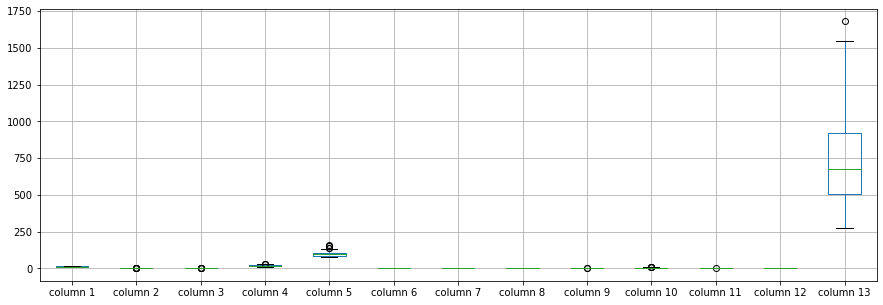

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.991524
column 2       2.227400
column 3       2.375973
column 4      19.402339
column 5      99.981707
column 6       2.292483
column 7       1.981410
column 8       0.359064
column 9       1.595789
column 10      4.901731
column 11      0.957271
column 12      2.615460
column 13    738.335366
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.125302,0.225384,-0.268746,0.234782,0.254777,0.114137,-0.117514,0.132795,0.574753,-0.070081,0.066060,0.612610
column 2,0.125302,1.000000,0.176434,0.294813,-0.044200,-0.315968,-0.444697,0.252759,-0.263032,0.193486,-0.504371,-0.339973,-0.174084
column 3,0.225384,0.176434,1.000000,0.388819,0.355973,0.076860,0.033693,0.141592,0.043264,0.221982,-0.061342,0.025460,0.225437
column 4,-0.268746,0.294813,0.388819,1.000000,-0.030050,-0.270716,-0.364573,0.366567,-0.196956,0.020347,-0.320527,-0.265418,-0.469106
column 5,0.234782,-0.044200,0.355973,-0.030050,1.000000,0.200266,0.145143,-0.233506,0.217972,0.176094,0.018109,0.089222,0.373016
column 6,0.254777,-0.315968,0.076860,-0.270716,0.200266,1.000000,0.814041,-0.443781,0.598209,0.055087,0.352231,0.645468,0.467641
column 7,0.114137,-0.444697,0.033693,-0.364573,0.145143,0.814041,1.000000,-0.494527,0.638044,-0.185397,0.559907,0.786669,0.420199
column 8,-0.117514,0.252759,0.141592,0.366567,-0.233506,-0.443781,-0.494527,1.000000,-0.353039,0.145814,-0.219993,-0.476734,-0.238318
column 9,0.132795,-0.263032,0.043264,-0.196956,0.217972,0.598209,0.638044,-0.353039,1.000000,0.031012,0.264304,0.509472,0.265577
column 10,0.574753,0.193486,0.221982,0.020347,0.176094,0.055087,-0.185397,0.145814,0.031012,1.000000,-0.453659,-0.363538,0.308388


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+75,13+75+75,13+75+75,13+75+75+75+75,13+75+75+75+75+75,13+75+75+75+75+75+75,13+75+75+75+75+75,13+75+75+75+75,13+75+75+75,13+75+75,13+75,13], vae_layer = False, seed = 750)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 872.7496226917614
Epoch: 1 , loss: 871.6177035245029
Epoch: 2 , loss: 874.4133633700284
Epoch: 3 , loss: 874.4630293412642
Epoch: 4 , loss: 866.9879205877131
Epoch: 5 , loss: 874.8955688476562
Epoch: 6 , loss: 874.1282237659801
Epoch: 7 , loss: 867.8515458540483
Epoch: 8 , loss: 866.4749644886364
Epoch: 9 , loss: 871.5285921963779
Epoch: 10 , loss: 877.3690241033381
Epoch: 11 , loss: 870.9745372425426
Epoch: 12 , loss: 869.6379339044744
Epoch: 13 , loss: 872.2151489257812
Epoch: 14 , loss: 874.1894697709517
Epoch: 15 , loss: 872.1332508433949
Epoch: 16 , loss: 877.0057428533381
Epoch: 17 , loss: 874.7599875710227
Epoch: 18 , loss: 862.7794966264205
Epoch: 19 , loss: 867.9232233220881
Epoch: 20 , loss: 864.7008445046165
Epoch: 21 , loss: 870.05517578125
Epoch: 22 , loss: 862.8851540305398
Epoch: 23 , loss: 864.0200750177556
Epoch: 24 , loss: 860.9154996004971
Epoch: 25 , loss: 865.505898215554
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.18526
column 2       3.80000
column 3       2.65000
column 4      18.60000
column 5     102.00000
column 6       2.41000
column 7       2.41000
column 8       0.25000
column 9       1.98000
column 10      4.50000
column 11      1.03000
column 12      3.52000
column 13    770.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.697315,0.0,0.0,0.0,0.0,-2.256968,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.911470,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-10.093079,-5.107134,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
174,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
175,0.000000,-3.682184,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
176,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3234.3000598587255, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.2967771060653968

In [18]:
new_df.iloc[66,:]

column 1     13.110000
column 2      1.010000
column 3      0.528419
column 4     15.000000
column 5     78.000000
column 6      2.980000
column 7      3.180000
column 8      0.260000
column 9      2.280000
column 10     5.300000
column 11     1.120000
column 12     3.180000
column 13    82.204376
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.430000,15.6,127.0,2.80,3.060000,0.28,2.29,5.64,1.04,3.920000,1065.0
1,13.200000,1.780000,2.140000,11.2,100.0,2.65,2.062685,0.26,1.28,4.38,1.05,1.143032,1050.0
2,13.160000,2.360000,2.670000,18.6,101.0,2.80,3.240000,0.30,2.81,5.68,1.03,3.170000,1185.0
3,14.370000,1.950000,2.500000,16.8,113.0,3.85,5.401470,0.24,2.18,7.80,0.86,3.450000,1480.0
4,13.240000,2.590000,2.870000,21.0,118.0,2.80,2.690000,0.39,1.82,4.32,1.04,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.616921,0.542866,2.450000,20.5,95.0,1.68,0.610000,0.52,1.06,7.70,0.64,1.740000,740.0
174,13.400000,3.910000,2.480000,23.0,102.0,1.80,0.750000,0.43,1.41,7.30,0.70,1.560000,750.0
175,13.270000,0.597816,2.260000,20.0,120.0,1.59,0.690000,0.43,1.35,10.20,0.59,1.560000,835.0
176,13.170000,2.590000,2.370000,20.0,120.0,1.65,0.680000,0.53,1.46,9.30,0.60,1.620000,840.0


In [20]:
imputations[-1].to_excel("Wine_NN_10(imp).xlsx", index=False, header=False)